## Introduction
1. About this project:

The purpose of this project is studying the Capital Bikeshare Usage and provide possible suggestions on the allocation of bike resource allocation.It applys Linear Regression model to predict bikes usage amount under different scenarios.

2. About the dataset:

the dataset is download from UCL Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset). The original data comes from Capital Bikeshare Official website(http://capitalbikeshare.com/system-data)

3. About the Attribute:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered



In [1]:
### import necessary packages for preparing the data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import numpy as np
if not os.path.exists("figs"): os.makedirs("figs")
if not os.path.exists("figs/univariate_analysis"): os.makedirs("figs/univariate_analysis")
if not os.path.exists("figs/bivariate_analysis"): os.makedirs("figs/bivariate_analysis")

C:\Users\ydzco\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
### retrieve the data from the downloaded dataset
file = "Capital Bikeshare Raw Data.csv"
df = pd.read_csv(file, index_col = 1)
df

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


## step 1: univariate analysis

temp
minimum value is:  0.0591304
maxmium value is:  0.861667


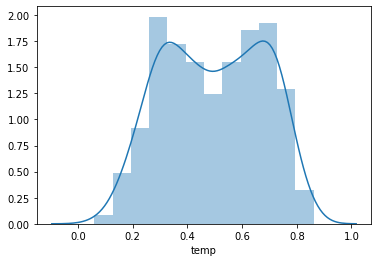


atemp
minimum value is:  0.0790696
maxmium value is:  0.8408959999999999


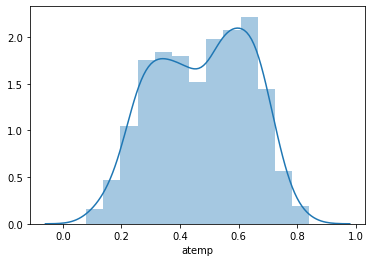


hum
minimum value is:  0.0
maxmium value is:  0.9725


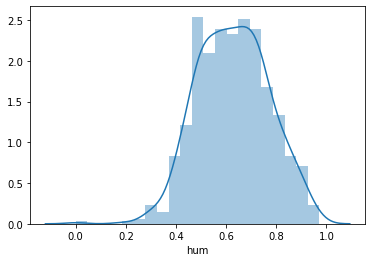


windspeed
minimum value is:  0.0223917
maxmium value is:  0.507463


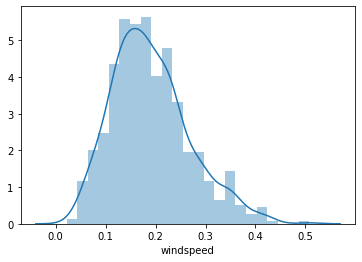


casual
minimum value is:  2
maxmium value is:  3410


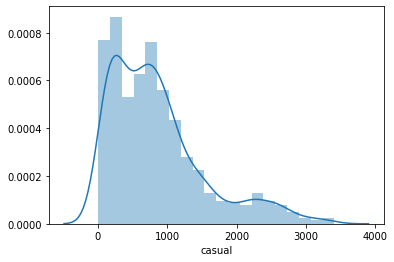


registered
minimum value is:  20
maxmium value is:  6946


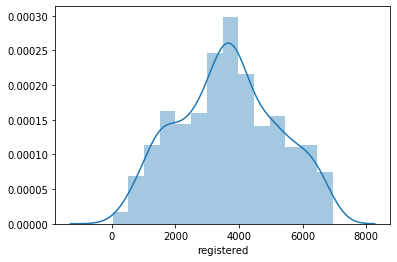


cnt
minimum value is:  22
maxmium value is:  8714


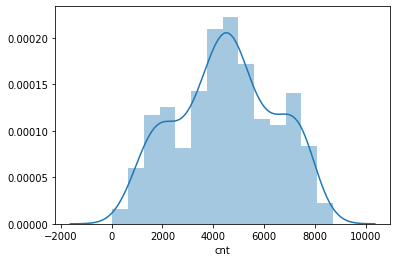

In [3]:
# continuous variables
continous_cols = ['temp', 'atemp', 'hum', 'windspeed','casual','registered', 'cnt']
for col in continous_cols:
    print(col)
    print("minimum value is: ", df[col].min())
    print("maxmium value is: ", df[col].max())
    sns.distplot(df[col], label = "univariate analysis on: " + col)
    plt.savefig("figs/univariate_analysis/" + col + ".png")
    plt.show()
    print()

season
AxesSubplot(0.125,0.125;0.775x0.755)


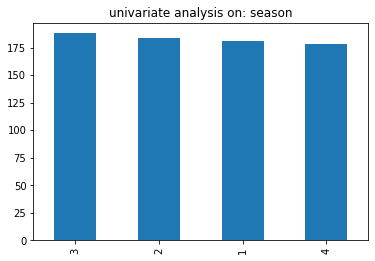


yr
AxesSubplot(0.125,0.125;0.775x0.755)


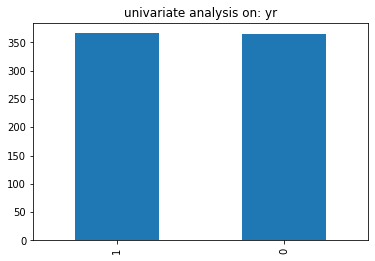


mnth
AxesSubplot(0.125,0.125;0.775x0.755)


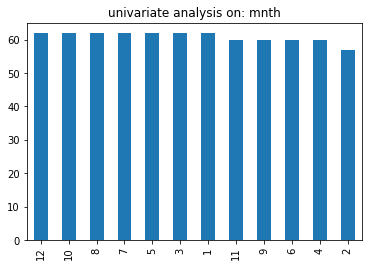


holiday
AxesSubplot(0.125,0.125;0.775x0.755)


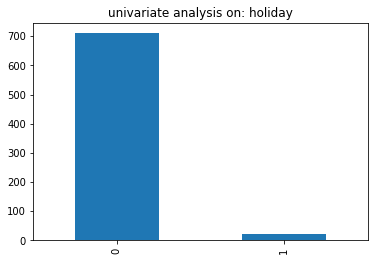


weekday
AxesSubplot(0.125,0.125;0.775x0.755)


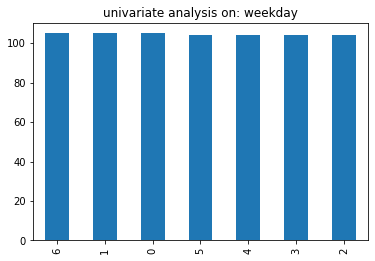


workingday
AxesSubplot(0.125,0.125;0.775x0.755)


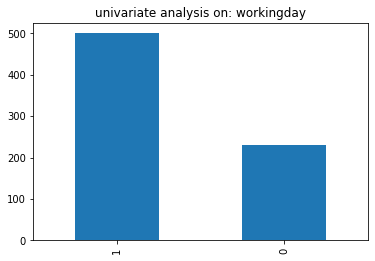


weathersit
AxesSubplot(0.125,0.125;0.775x0.755)


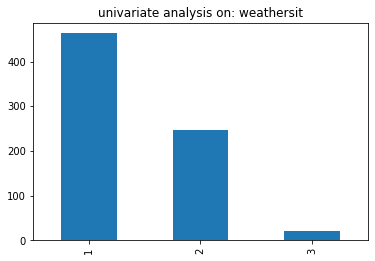

In [4]:
# categorical variables
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday','weathersit']
for col in categorical_columns:
    print(col)
    print(df[col].value_counts().plot(kind = "bar", title = "univariate analysis on: " + col))
    plt.savefig("figs/univariate_analysis/" + col + ".png")
    plt.show()
    print()

## step 2: bivariate analysis

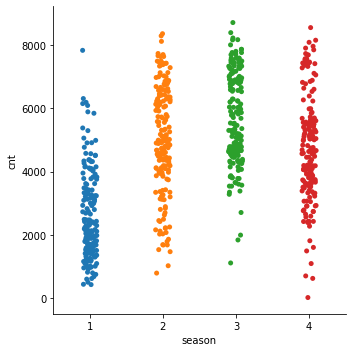

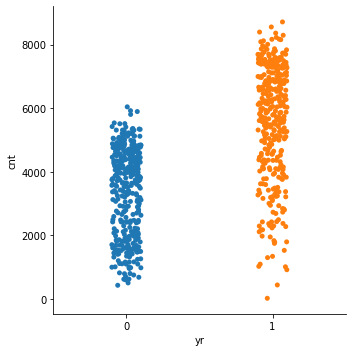

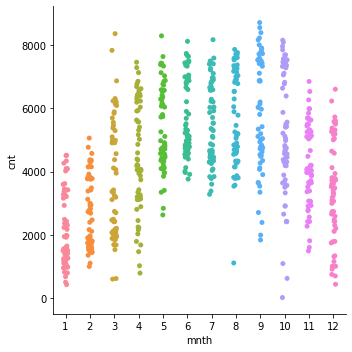

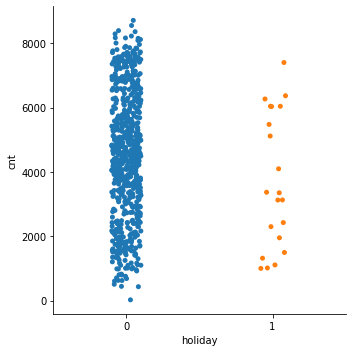

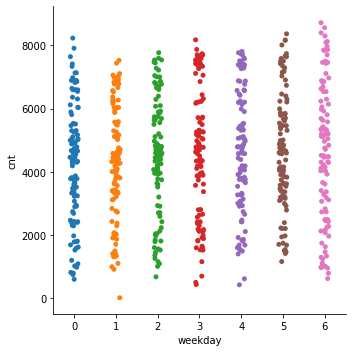

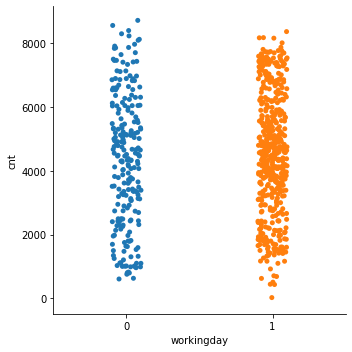

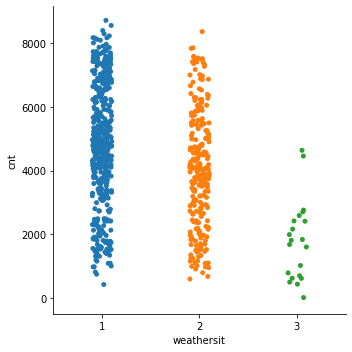

In [5]:
# study relationship of count and categorical variables
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday','weathersit']
for col in categorical_columns:
    sns.catplot(x=col, y="cnt", data=df, legend = True)
    plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.show()

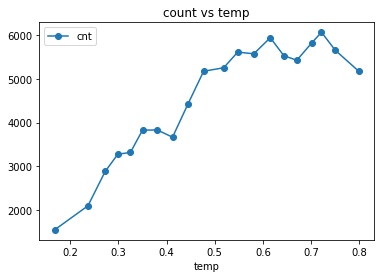

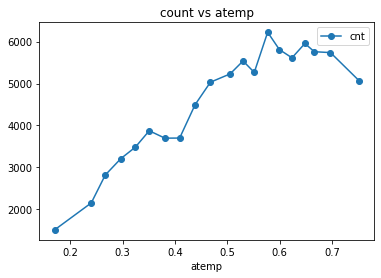

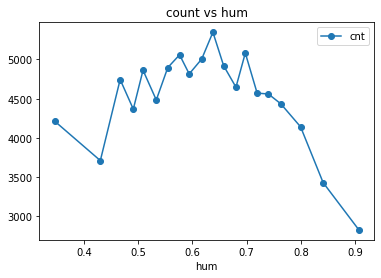

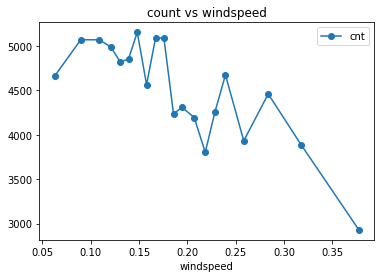

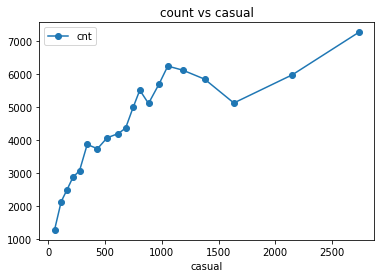

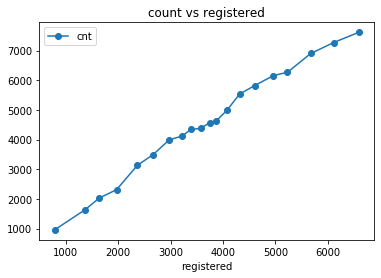

In [6]:
# study relationship of count and continous variables
continous_cols = ['temp', 'atemp', 'hum', 'windspeed','casual','registered']
for col in continous_cols:
    df.groupby(pd.qcut(df[col],20))[[col, 'cnt']].mean().plot(
        x = col, y = 'cnt',title = "count vs " + col, figsize = (6,4), style = "-o")
    plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.show()
    #plt.plot(grouped_df.index, grouped_df.values)

## step 3: multivariate analysis

In [7]:
pd.pivot_table(df, values = 'cnt', index = "season", columns = 'weathersit') # both categorical variables

weathersit,1,2,3
season,,,
1,2811.135135,2357.166667,934.75
2,5548.548673,4236.705882,1169.00
3,5878.257353,5222.479167,2751.75
4,5043.563107,4654.000000,1961.60


In [8]:
pd.pivot_table(df, values = 'cnt', index = "season", columns = pd.qcut(df['temp'], 5)) # both categorical variables

temp,"(0.0581, 0.316]","(0.316, 0.428]","(0.428, 0.562]","(0.562, 0.686]","(0.686, 0.862]"
season,,,,,
1,2054.814815,2927.20000,4767.062500,6079.500000,NaN
2,2041.700000,3663.52381,5005.555556,5712.588235,5337.818182
3,NaN,NaN,4968.250000,5522.607143,5742.879032
4,4028.379310,4236.70000,5368.627119,5573.600000,NaN


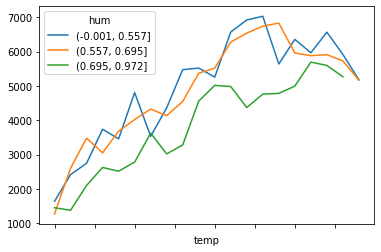

In [9]:
pd.pivot_table(df, values = 'cnt', columns = pd.qcut(df['hum'], 3), index = pd.qcut(df['temp'], 20)).plot()

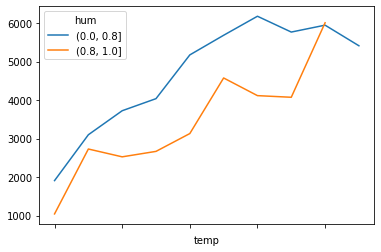

In [10]:
pd.pivot_table(df, values = 'cnt', columns = pd.cut(df['hum'], [0,0.8,1]), index = pd.qcut(df['temp'], 10)).plot()

## Step 4: feature engineering

In [11]:
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [12]:
df['weathersit_is_2'] = df['weathersit'] == 2
df['weathersit_is_3'] = df['weathersit'] == 3
df['atemp_0.2'] = np.maximum(df['atemp'] - 0.2,0)
df['atemp_0.6'] = np.maximum(df['atemp'] - 0.6, 0)
df['atemp_0.7'] = np.maximum(df['atemp'] - 0.7, 0)
df['hum_0.7'] = np.maximum(df['hum'] - 0.7, 0)
df['windspeed_0.3'] = np.maximum(df['windspeed'] - 0.3, 0)
feature_cols = ['yr', 'workingday', 'holiday']
for col in df.columns:
    if "weathersit_" in col or 'atemp' in col or 'hum' in col or 'wind' in col:
        feature_cols.append(col)
print(feature_cols)
df[feature_cols]

['yr', 'workingday', 'holiday', 'atemp', 'hum', 'windspeed', 'weathersit_is_2', 'weathersit_is_3', 'atemp_0.2', 'atemp_0.6', 'atemp_0.7', 'hum_0.7', 'windspeed_0.3']


,yr,workingday,holiday,atemp,hum,windspeed,weathersit_is_2,weathersit_is_3,atemp_0.2,atemp_0.6,atemp_0.7,hum_0.7,windspeed_0.3
dteday,,,,,,,,,,,,,
2011-01-01,0,0,0,0.363625,0.805833,0.160446,True,False,0.163625,0.0,0.0,0.105833,0.000000
2011-01-02,0,0,0,0.353739,0.696087,0.248539,True,False,0.153739,0.0,0.0,0.000000,0.000000
2011-01-03,0,1,0,0.189405,0.437273,0.248309,False,False,0.000000,0.0,0.0,0.000000,0.000000
2011-01-04,0,1,0,0.212122,0.590435,0.160296,False,False,0.012122,0.0,0.0,0.000000,0.000000
2011-01-05,0,1,0,0.229270,0.436957,0.186900,False,False,0.029270,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,0,0.226642,0.652917,0.350133,True,False,0.026642,0.0,0.0,0.000000,0.050133
2012-12-28,1,1,0,0.255046,0.590000,0.155471,True,False,0.055046,0.0,0.0,0.000000,0.000000
2012-12-29,1,0,0,0.242400,0.752917,0.124383,True,False,0.042400,0.0,0.0,0.052917,0.000000


## Step 5: linear regression model

In [13]:
from sklearn.linear_model import LinearRegression
X = df[feature_cols]
y = df['cnt']

model = LinearRegression()
model.fit(X, y)
df['predict'] = model.predict(X)


In [14]:
params = pd.Series(model.coef_, index=X.columns)
params.sort_index()

atemp               4631.576311
atemp_0.2           5267.658280
atemp_0.6         -17563.722390
atemp_0.7          -3644.536063
holiday             -577.083874
hum                 -745.767161
hum_0.7            -3928.056170
weathersit_is_2     -417.751401
weathersit_is_3    -1272.510040
windspeed          -2349.674895
windspeed_0.3      -7157.522811
workingday            74.151903
yr                  1946.245367
dtype: float64

## step 6 : error analysis

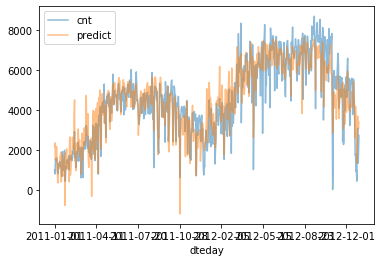

In [15]:
df[['cnt', 'predict']].plot(alpha= 0.5)

In [16]:
df['error'] = df['cnt'] - df['predict']
print('The error range is ', df['error'].min(),'to', df['error'].max())

The error range is  -3144.5467521862593 to 3315.5424938408373


In [17]:
model.score(X,y)

0.8327250582322973

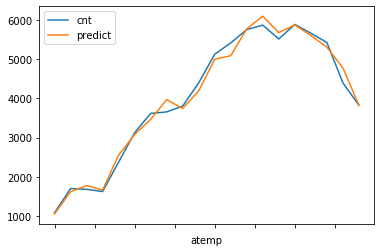

In [18]:
df.groupby(pd.cut(df['atemp'], 20))[['cnt', 'predict']].mean().plot()

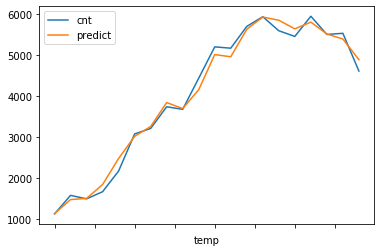

In [19]:
df.groupby(pd.cut(df['temp'], 20))[['cnt', 'predict']].mean().plot()

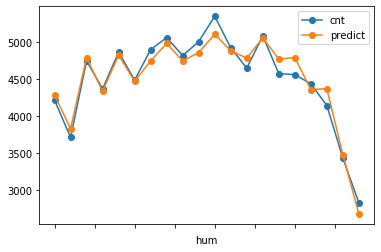

In [20]:
df.groupby(pd.qcut(df['hum'], 20))[['cnt', 'predict']].mean().plot(style = '-o')

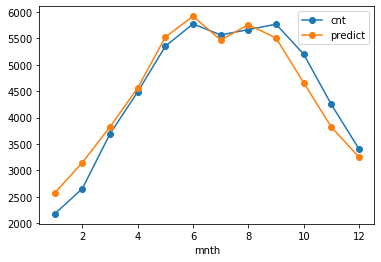

In [21]:
df.groupby('mnth')[['cnt', 'predict']].mean().plot(style = '-o')

## Step 7: model tuning

In [22]:
df['yr2'] = df['yr'] + 1/12 * df['mnth']

In [23]:
if 'yr' in feature_cols: feature_cols.remove('yr')
if 'yr2' not in feature_cols: feature_cols.append('yr2')

In [25]:
X = df[feature_cols]
y = df['cnt']
model = LinearRegression()
model.fit(X, y)
df['predict'] = model.predict(X)
model.score(X,y)

0.8408992683046332

In [26]:
df['error2'] = df['cnt'] - df['predict']
print('The error range is ', df['error'].min(),'to', df['error'].max())

The error range is  -3144.5467521862593 to 3315.5424938408373


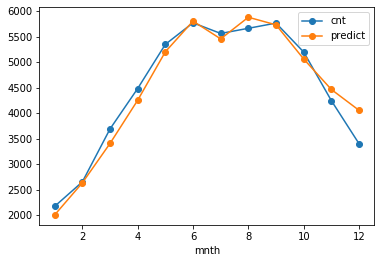

In [27]:
df.groupby('mnth')[['cnt', 'predict']].mean().plot(style = '-o')